In [127]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
import pandas as pd
import numpy as np

In [129]:
from pandarallel import pandarallel
import multiprocessing

num_processors = multiprocessing.cpu_count()
print(f'Available CPUs: {num_processors}')

pandarallel.initialize(nb_workers=num_processors-1, use_memory_fs=False)

Available CPUs: 4
INFO: Pandarallel will run on 3 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [130]:
from helpers.gcs_funcs import list_blobs, list_blobs_pd

In [131]:
BUCKET_NAME = "XXX"
FULL_BUCKET_NAME = "gs://" + BUCKET_NAME 
FOLDER_NAME = "CEFR"

In [132]:
files_df = list_blobs_pd(bucket_name=BUCKET_NAME, 
           folder_name=FOLDER_NAME)
file_names = list(files_df.iloc[1:]["Name"])

In [133]:
file_names

['CEFR/CEFR - CEFR_ASAG.csv',
 'CEFR/CEFR_kaggle.csv',
 'CEFR/CLC_FCE-FCE_released.csv',
 'CEFR/EnglishProfile_CEFR_Words.csv',
 'CEFR/NewsInLevels_dataset.csv',
 'CEFR/OneStopEnglishCorpus_Dataset.csv',
 'CEFR/OxfordCEFRWordList.csv',
 'CEFR/book_levels.csv',
 'CEFR/models/',
 'CEFR/models/tf_model.h5',
 'CEFR/models/tf_model.preproc']

In [134]:
df1 = pd.read_csv(FULL_BUCKET_NAME + "/CEFR/CEFR_kaggle.csv")
df2 = pd.read_csv(FULL_BUCKET_NAME + "/CEFR/NewsInLevels_dataset.csv")
df3 = pd.read_csv(FULL_BUCKET_NAME + "/CEFR/OneStopEnglishCorpus_Dataset.csv")
df4 = pd.read_csv(FULL_BUCKET_NAME + "/CEFR/CLC_FCE-FCE_released.csv")
df5 = pd.read_csv(FULL_BUCKET_NAME + "/CEFR/CEFR - CEFR_ASAG.csv")

### CEFR Kaggle Dataset

In [135]:
df1.head()

,text,label
0,Hi!\nI've been meaning to write for ages and f...,B2
1,﻿It was not so much how hard people found the ...,B2
2,Keith recently came back from a trip to Chicag...,B2
3,"The Griffith Observatory is a planetarium, and...",B2
4,-LRB- The Hollywood Reporter -RRB- It's offici...,B2


In [136]:
df1.label.value_counts()

A1    288
B2    286
A2    272
C1    241
B1    205
C2    202
Name: label, dtype: int64

In [137]:
df1.shape

(1494, 2)

#### Elementary

In [138]:
print(df1[df1.label=="A1"].iloc[0]["text"])

You need to try harder in school!
I am doing well in school.
Then why are your marks in science so low?
I don't understand science, that's all.
Is that the same reasoning you have for math?
Yes, and English, too.
Tell me one single subject you're doing well in.
Well, I'm doing wonderfully in my music class.
What about history?
Only the parts about Woodstock.
That's it! You're grounded! No guitar for a month.
Great, now I'll surely have a low GPA.


#### Intermediate

In [139]:
print(df1[df1.label=="B1"].iloc[1]["text"])

David and Melissa had been a happily married couple for six years. They lived a comfortably modest life in a small apartment and had been saving up for years in preparation for the next giant step in their life: a baby. However, after repeatedly trying to get pregnant for a whole year, they consulted a doctor and received devastating news. Melissa would be unable to conceive a child for the rest of her life.
The bad news struck Melissa terribly hard. Seeing his wife in such a distraught and depressed state broke David's heart. "Don't worry," he told her. "I'm going to make you the happiest woman in the planet, even if it's just the two of us." He then went to the bank, took out all their savings that had been held for the baby, and set out to do whatever he could to cheer his wife up.
Since they no longer had to be careful with how much money they spent, David began splurging on everything he could think of. First, he took Melissa shopping for the finest and most beautiful clothes she 

#### Advanced

In [140]:
print(df1[df1.label=="C1"].iloc[0]["text"])

Police and neighbors were searching for three young Michigan boys Saturday who have been missing since their father claimed he dropped them off with a woman before trying to kill himself a day earlier.
The father survived his suicide attempt and is being cared for in a mental health facility, said Morenci, Michigan, Police Chief Larry Weeks on Saturday.
But Michigan authorities do not know what has happened to his boys -- 5-year-old Tanner Skelton, 7-year-old Alexander William Skelton and 9-year-old Andrew Skelton -- prompting them to issue an Amber Alert on Friday.
Weeks said that the boysfather, John Skelton, told police that he dropped the boys off Friday morning with a woman he identified as Joann Taylor -- in part to ensure they did n't see him while and after he tried to commit suicide.
John Skelton told police that the woman, whom he allegedly met on the internet, was supposed to drop the boys off at their home in Morenci, a southern Michigan town of about 2,400 people about 40 

In [141]:
# Mapping dictionary
mapping = {'A': 1, 'B': 2, 'C': 3}

# Update the DataFrame column
df1['label'] = df1['label'].str[0].map(mapping)

print(df1)

                                                   text  label
0     Hi!\nI've been meaning to write for ages and f...      2
1     ﻿It was not so much how hard people found the ...      2
2     Keith recently came back from a trip to Chicag...      2
3     The Griffith Observatory is a planetarium, and...      2
4     -LRB- The Hollywood Reporter -RRB- It's offici...      2
...                                                 ...    ...
1489  Light propagating in the vicinity of astrophys...      3
1490  Future of dentistry has become one of the most...      3
1491  ﻿The forests – and suburbs – of Europe are ech...      3
1492  Hedge funds are turning bullish on oil once ag...      3
1493  Without additional heating, radiative cooling ...      3

[1494 rows x 2 columns]


In [142]:
df1.label.value_counts()

1    560
2    491
3    443
Name: label, dtype: int64

In [143]:
df1["source"] = "cefr_kaggle"
df1 = df1[["text", "source", "label"]]

### NewsInLevels Dataset

In [144]:
df2.head()

,level_url,level,text
0,https:www.newsinlevels.comproductsscientists-i...,1,Scientists at a research station in Norway are...
1,https:www.newsinlevels.comproductsscientists-i...,2,Scientists who are researching the Arctic regi...
2,https:www.newsinlevels.comproductsscientists-i...,3,Scientists studying the Arctic region from the...
3,https:www.newsinlevels.comproductseasy-speakin...,1,"Hello students, There is a website for you. It..."
4,https:www.newsinlevels.comproductseasy-speakin...,2,"Hello students,\nWe have a website for you. It..."


In [145]:
df2.level.value_counts()

1    3700
3    3699
2    3698
Name: level, dtype: int64

In [146]:
df2.shape

(11097, 3)

#### Elementary

In [147]:
print(df2.iloc[0]["text"])

Scientists at a research station in Norway are having problems researching the Arctic region. They need to work fast because the area is changing. The changes are faster than anywhere else in the world.
The Arctic is warming four times faster than other places. On the Svalbard islands, temperatures are climbing up to seven times quicker than in the rest of the world. Sea ice is melting. Arctic animals like polar bears are changing their behavior. They find new areas for hunting. Buildings are getting damaged because of melting ice and ground. It is also getting more challenging to reach research sites.
The scientists are working fast. They want to understand how these changes will impact the planet’s future.



#### Intermediate

In [148]:
print(df2.iloc[1]["text"])

Scientists who are researching the Arctic region from the Ny-Aalesund research station in Norway are having problems.
They need to work fast because the area is changing faster than anywhere else in the world. The Arctic is heating up four times faster than the rest of the world, and on the Svalbard archipelago, temperatures are rising up to seven times the global average. Higher temperatures cause sea ice to melt and Arctic animals, such as polar bears, change their behavior. Melting ice and permafrost cause damage to buildings in the region, and research sites are becoming more difficult to reach.
Scientists are hurrying to understand the impact of the changes in the region on the future of the planet.



#### Advanced

In [149]:
print(df2.iloc[2]["text"])

Scientists studying the Arctic region from the research station in Ny-Aalesund, Norway, are facing difficulties accessing and collecting data as the area is changing faster than anywhere else in the world.
The Arctic is warming four times faster than the rest of the world, with the Svalbard archipelago experiencing temperatures that are climbing up to seven times the global average. The warmer temperatures and loss of sea ice have led to changes in the behavior of Arctic animals, such as polar bears, who have lost their hunting grounds due. Melting glaciers and permafrost have caused damage to buildings in the region, including the town store that’s being repaired this year, and research sites have become harder to reach.
Despite the challenges, scientists are rushing to understand the implications of the changes in the region for the planet’s future.



In [150]:
df2.rename(columns={"level": "label"}, inplace=True)

In [151]:
df2["source"] = "news_in_levels"
df2 = df2[["text", "source", "label"]]

In [152]:
df2.head()

,text,source,label
0,Scientists at a research station in Norway are...,news_in_levels,1
1,Scientists who are researching the Arctic regi...,news_in_levels,2
2,Scientists studying the Arctic region from the...,news_in_levels,3
3,"Hello students, There is a website for you. It...",news_in_levels,1
4,"Hello students,\nWe have a website for you. It...",news_in_levels,2


### OneStopEnglishCorpus Dataset

In [153]:
df3.head()

,url,text,level
0,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,"﻿When you see the word Amazon, what’s the firs...",Elementary
1,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,"﻿To tourists, Amsterdam still seems very liber...",Elementary
2,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,"﻿Anitta, a music star from Brazil, has million...",Elementary
3,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,Google has made maps of the world’s highest mo...,Elementary
4,/nishkalavallabhi/OneStopEnglishCorpus/blob/ma...,﻿The auction of a Banksy painting that disappe...,Elementary


In [154]:
df3.level.value_counts()

Elementary      189
Intermediate    189
Advanced        189
Name: level, dtype: int64

In [155]:
df3.shape

(567, 3)

#### Elementary

In [156]:
print(df3[df3.level=="Elementary"].iloc[0]["text"])

﻿When you see the word Amazon, what’s the first thing you think of – the world’s biggest forest, the longest river or the largest internet shop – and which do you think is most important? 
These are the questions in a debate about the internet. Brazil and Peru have made objections to a bid made by the US online shop for the domain name, “.amazon”. 
Amazon has asked for its company name to be a top-level domain name (currently “.com”), but the South American governments say this would stop the use of this internet address for environmental protection, indigenous rights and other public interest uses. 
There are many other disputed claims to names, including “.patagonia”. 
Until now, the differences between commercial, governmental and other types of identity were easy to see in every internet address by the use of “.com”, “.gov” and 20 other categories. 
But soon there are going to be more of these categories – or generic top-level domains (gTLDs) as they are technically known. 
The Int

#### Intermediate

In [157]:
print(df3[df3.level=="Intermediate"].iloc[0]["text"])

When you see the word Amazon, whats the first thing you think of  the worlds biggest forest, the longest river or the largest internet shop  and which do you think is most important?These are questions in a debate about how to redraw the boundaries of the internet. Brazil and Peru have made objections to a bid made by the huge US e-commerce company for a prime new piece of cyberspace: .amazon.The Seattle-based company has applied for its brand to be a top-level domain name (currently .com), but the South American governments argue this would prevent the use of this internet address for environmental protection, the promotion of indigenous rights and other public interest uses.Together with many other disputed claims to names, including .patagonia, the issue goes directly to the heart of debates about the purpose and governance of the internet.Until now, the differences between commercial, governmental and other types of identity were easy to see in every internet address by the use of 

#### Advanced

In [158]:
print(df3[df3.level=="Advanced"].iloc[0]["text"])

﻿When you see the word Amazon, what’s the first thing that springs to mind – the world’s biggest forest, the longest river or the largest internet retailer – and which do you consider most important?  These questions have risen to the fore in an arcane, but hugely important, debate about how to redraw the boundaries of the internet. Brazil and Peru have lodged objections to a bid made by the US e-commerce giant for a prime new piece of cyberspace: “.amazon”.  The Seattle-based company has applied for its brand to be a top-level domain name (currently “.com”), but the South American governments argue this would prevent the use of this internet address for environmental protection, the promotion of indigenous rights and other public interest uses.  Along with dozens of other disputed claims to names, including “.patagonia” and “.shangrila ”, the issue cuts to the heart of debates about the purpose and governance of the internet.  Until now, the differences between commercial, governmenta

In [159]:
df3.rename(columns={"level": "label"}, inplace=True)

In [160]:
df3["source"] = "onestop_english_corpus"
df3 = df3[["text", "source", "label"]]

In [161]:
# Mapping dictionary
mapping = {'Elementary': 1, 'Intermediate': 2, 'Advanced': 3}

# Update the DataFrame column
df3['label'] = df3['label'].map(mapping)

print(df3)

                                                  text  \
0    ﻿When you see the word Amazon, what’s the firs...   
1    ﻿To tourists, Amsterdam still seems very liber...   
2    ﻿Anitta, a music star from Brazil, has million...   
3    Google has made maps of the world’s highest mo...   
4    ﻿The auction of a Banksy painting that disappe...   
..                                                 ...   
562  ﻿In typical bad-boyfriend style, Dan Sullivan ...   
563  ﻿Thousands of people protested on Australia’s ...   
564  ﻿1 Race engineer  A race engineer liaises betw...   
565  ﻿More than one million British workers might b...   
566  ﻿Low-income countries will remain on the front...   

                     source  label  
0    onestop_english_corpus      1  
1    onestop_english_corpus      1  
2    onestop_english_corpus      1  
3    onestop_english_corpus      1  
4    onestop_english_corpus      1  
..                      ...    ...  
562  onestop_english_corpus      3  
563  on

### ASAG

In [162]:
df4.head()

,answer,exam_score,file_name
0,"Dear Ms Jane Clark, Recently I visited an arts...",3.2,0102_2000_12
1,"Dear Ana, Thanks for your letter and postcard....",2.3,0102_2000_12
2,"16.12.00 Dear Jane Firstly, I want to tell you...",4.3,0102_2000_12
3,"16.12.00 Dear Andrew, I just received your let...",4.2,0102_2000_12
4,"Dear Jane, I have read the advertisement for t...",3.1,0102_2000_12


In [163]:
df4.shape

(2473, 3)

In [164]:
import re

def remove_characters(string):
    cleaned_string = re.sub(r"[^0-9.]", "", str(string))
    if len(cleaned_string) == 0:
        return -999
    if (cleaned_string[0]=="."):
        cleaned_string = "0." + cleaned_string[1]
    return cleaned_string

df4["exam_score"] = df4["exam_score"].apply(lambda t: remove_characters(t))
df4 = df4[df4.exam_score != "51"]

In [165]:
df4.shape

(2472, 3)

In [166]:
df4["exam_score"] = df4["exam_score"].astype(float)

In [167]:
exam_score_mapping = {"1": [0. , 1.1], "2": [1.2, 4.3], "3" : [5.1, 9]}

labels = []
for idx, row in df4.iterrows():
    answer = row["answer"]
    exam_score = row["exam_score"]
    for k, v in exam_score_mapping.items():
        is_break = False
        start_score, end_score = v[0], v[1]
        if (exam_score>=start_score) & (exam_score<=end_score):
            labels.append(k)
            is_break = True
            break
        
    if not is_break:
        labels.append("4")

In [168]:
df4["source"] = "asag"
df4["label"] = [int(i) for i in labels]
df4.rename(columns={"answer": "text"}, inplace=True)

In [169]:
df4 = df4[df4.label != 4]
df4.columns

Index(['text', 'exam_score', 'file_name', 'source', 'label'], dtype='object')

In [170]:
df4 = df4[["text", "source", "label"]]

In [171]:
df4.head()

,text,source,label
0,"Dear Ms Jane Clark, Recently I visited an arts...",asag,2
1,"Dear Ana, Thanks for your letter and postcard....",asag,2
2,"16.12.00 Dear Jane Firstly, I want to tell you...",asag,2
3,"16.12.00 Dear Andrew, I just received your let...",asag,2
4,"Dear Jane, I have read the advertisement for t...",asag,2


### CEFR FCE

In [172]:
df5.head()

,text,label,file_name
0,In 10 years time we will be in 2026. I will be...,A2,0059.xml
1,"In ten years, the life will be really differen...",A2,0065.xml
2,I would say that compulsory is too strong. If ...,B2,0298.xml
3,"If I won 1 million euros, I will share it and ...",B1,0515.xml
4,"Hi ! Thanks you for your invitation, I'll come...",A2,0501.xml


In [173]:
df5.label.unique().tolist()

['A2', 'B2', 'B1', 'C1', 'C2', 'A1']

In [174]:
# Mapping dictionary
mapping = {'A': 1, 'B': 2, 'C': 3}

# Update the DataFrame column
df5['label'] = df5['label'].str[0].map(mapping)

print(df5)

                                                  text  label file_name
0    In 10 years time we will be in 2026. I will be...      1  0059.xml
1    In ten years, the life will be really differen...      1  0065.xml
2    I would say that compulsory is too strong. If ...      2  0298.xml
3    If I won 1 million euros, I will share it and ...      2  0515.xml
4    Hi ! Thanks you for your invitation, I'll come...      1  0501.xml
..                                                 ...    ...       ...
703  The most important thing to know is that if I ...      3  0256.xml
704  I don't think study abroad should be a compuls...      2  0281.xml
705  I think the most important is to have an enjoy...      2  0295.xml
706  During the first week of easter's holliday, i ...      1  0040.xml
707  I hope that I will have a job in computer scie...      1  0083.xml

[708 rows x 3 columns]


In [175]:
df5["source"] = "fce"
df5 = df5[["text", "source", "label"]]

### Combining the data

In [176]:
df = pd.concat([df1, df2, df3, df4, df5])

In [177]:
df

,text,source,label
0,Hi!\nI've been meaning to write for ages and f...,cefr_kaggle,2
1,﻿It was not so much how hard people found the ...,cefr_kaggle,2
2,Keith recently came back from a trip to Chicag...,cefr_kaggle,2
3,"The Griffith Observatory is a planetarium, and...",cefr_kaggle,2
4,-LRB- The Hollywood Reporter -RRB- It's offici...,cefr_kaggle,2
...,...,...,...
703,The most important thing to know is that if I ...,fce,3
704,I don't think study abroad should be a compuls...,fce,2
705,I think the most important is to have an enjoy...,fce,2
706,"During the first week of easter's holliday, i ...",fce,1


### Data Exploration on Data

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

In [179]:
df.head()

,text,source,label
0,Hi!\nI've been meaning to write for ages and f...,cefr_kaggle,2
1,﻿It was not so much how hard people found the ...,cefr_kaggle,2
2,Keith recently came back from a trip to Chicag...,cefr_kaggle,2
3,"The Griffith Observatory is a planetarium, and...",cefr_kaggle,2
4,-LRB- The Hollywood Reporter -RRB- It's offici...,cefr_kaggle,2


In [180]:
df.shape

(16334, 3)

In [181]:
import nltk
# nltk.download('punkt')
df["sentence_count"] = df["text"].parallel_apply(lambda t: len(nltk.sent_tokenize(t)))
df["word_count"] = df["text"].parallel_apply(lambda t: len(nltk.word_tokenize(t)))

In [183]:
df.source.unique().tolist()

['cefr_kaggle', 'news_in_levels', 'onestop_english_corpus', 'asag', 'fce']

#### Sentence Count Histogram by Sources

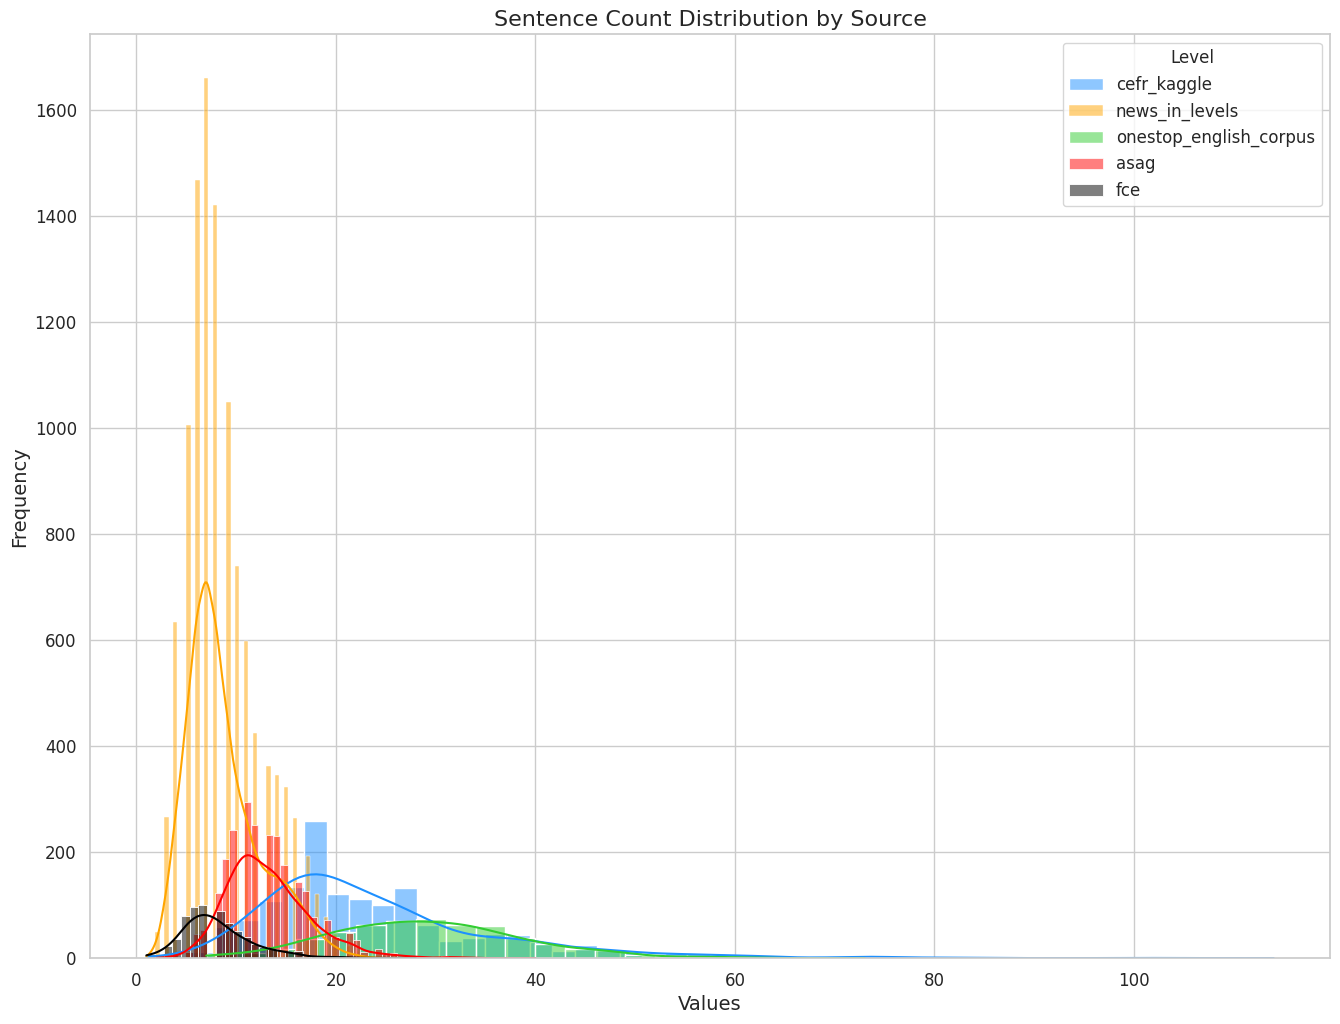

In [185]:
sns.set(style="whitegrid", context="notebook")

# Create the distplot for each level
fig, ax = plt.subplots(figsize=(16, 12))

color_map = {"cefr_kaggle": "dodgerblue", "news_in_levels": "orange", "onestop_english_corpus": "limegreen", "asag": "red", "fce": "black"}

for source in df["source"].unique():
    sns.histplot(data=df[df["source"] == source], 
                 x="sentence_count", 
                 kde=True, 
                 label=source, 
                 ax=ax, 
                 alpha=.5, 
                 color=color_map[source] )

# Customize the plot
ax.set_title("Sentence Count Distribution by Source", fontsize=16)
ax.set_xlabel("Values", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(title="Level", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()

#### Sentence Count Histogram by Language Levels

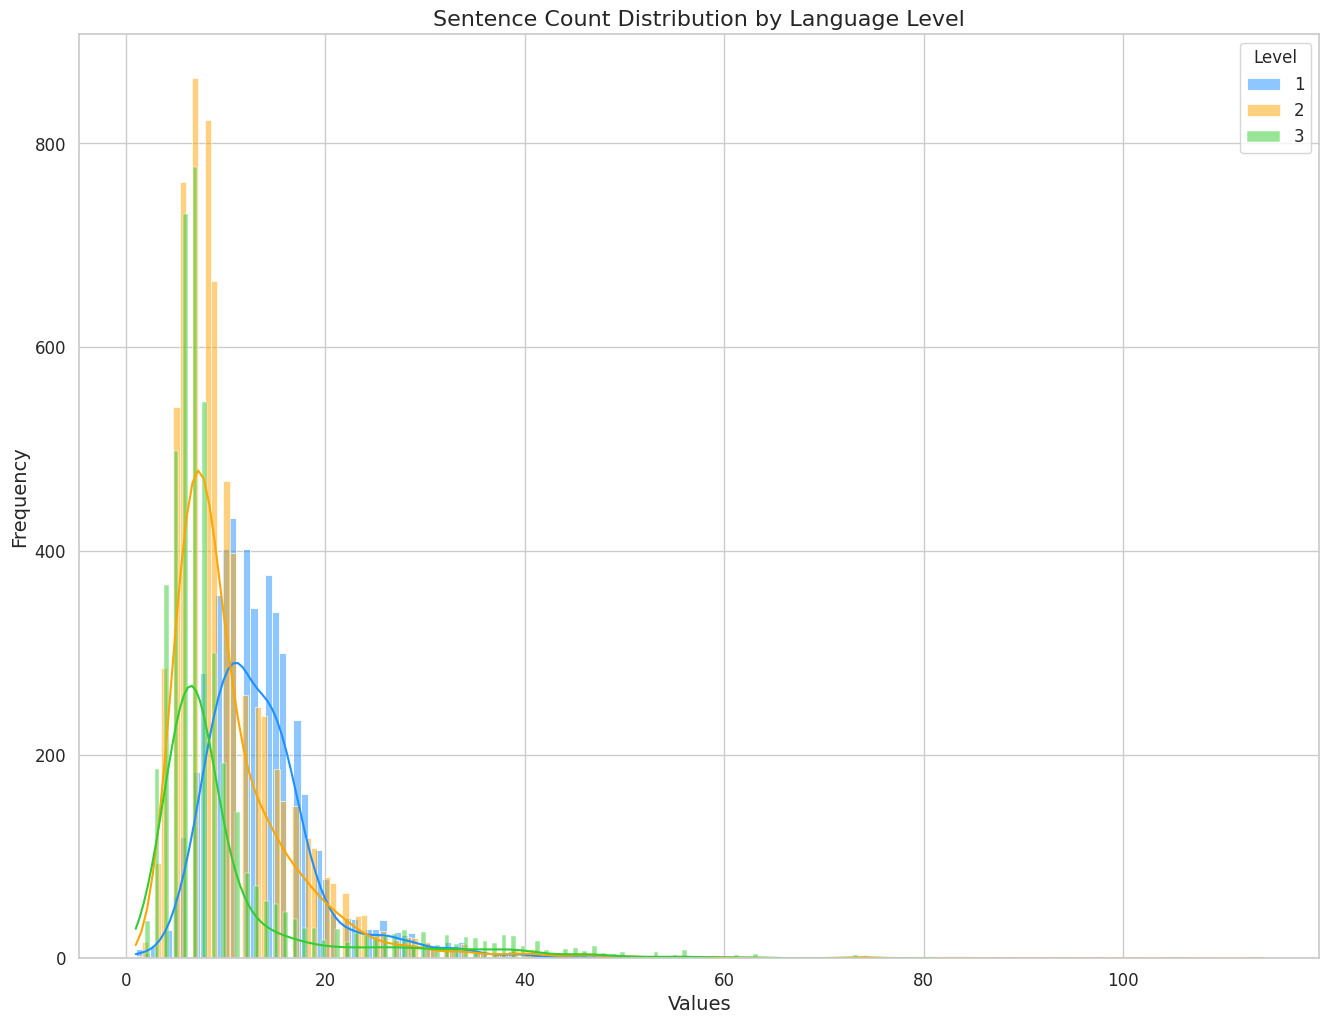

In [186]:
sns.set(style="whitegrid", context="notebook")

# Create the distplot for each level
fig, ax = plt.subplots(figsize=(16, 12))

color_map = {1: "dodgerblue", 2: "orange", 3: "limegreen", 4: "red", 5: "black"}

for level in [1,2,3]:
    sns.histplot(data=df[df["label"] == level], 
                 x="sentence_count", 
                 kde=True, 
                 label=level, 
                 ax=ax, 
                 alpha=.5, 
                 color=color_map[level] )

# Customize the plot
ax.set_title("Sentence Count Distribution by Language Level", fontsize=16)
ax.set_xlabel("Values", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(title="Level", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()

#### Word Count Histogram by Sources

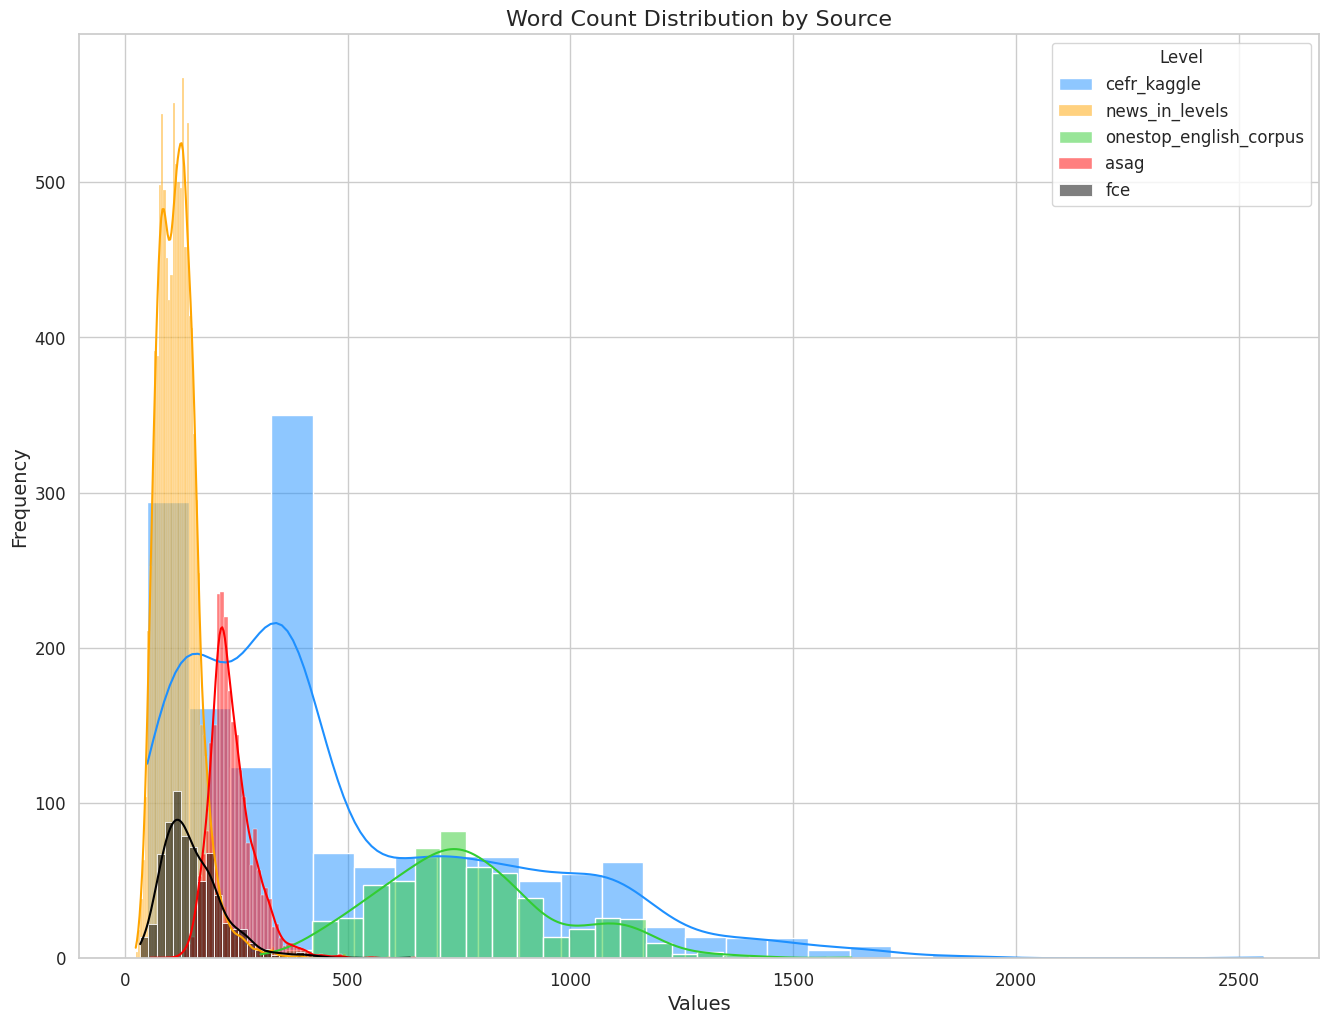

In [187]:
sns.set(style="whitegrid", context="notebook")

# Create the distplot for each level
fig, ax = plt.subplots(figsize=(16, 12))

color_map = {"cefr_kaggle": "dodgerblue", "news_in_levels": "orange", "onestop_english_corpus": "limegreen", "asag": "red", "fce": "black"}

for source in df["source"].unique():
    sns.histplot(data=df[df["source"] == source], 
                 x="word_count", 
                 kde=True, 
                 label=source, 
                 ax=ax, 
                 alpha=.5, 
                 color=color_map[source] )

# Customize the plot
ax.set_title("Word Count Distribution by Source", fontsize=16)
ax.set_xlabel("Values", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(title="Level", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()

#### Word Count Histogram by Language Levels

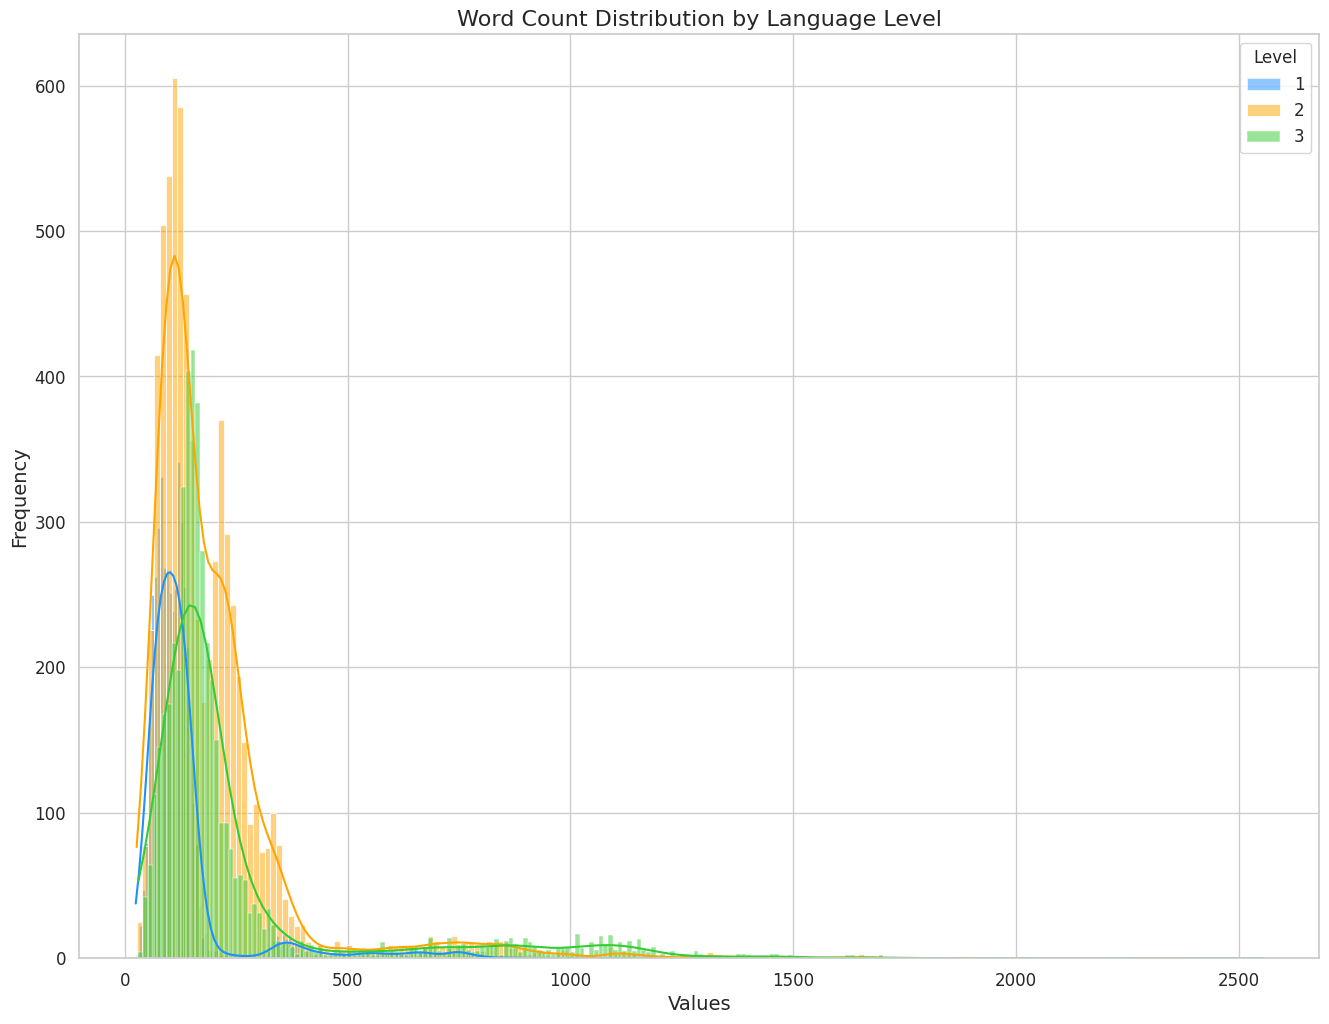

In [188]:
sns.set(style="whitegrid", context="notebook")

# Create the distplot for each level
fig, ax = plt.subplots(figsize=(16, 12))

color_map = {1: "dodgerblue", 2: "orange", 3: "limegreen"}

for level in [1,2,3]:
    sns.histplot(data=df[df["label"] == level], 
                 x="word_count", 
                 kde=True, 
                 label=level, 
                 ax=ax, 
                 alpha=.5, 
                 color=color_map[level] )

# Customize the plot
ax.set_title("Word Count Distribution by Language Level", fontsize=16)
ax.set_xlabel("Values", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(title="Level", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()

#### Word Cloud by Language Level

Language Level 1


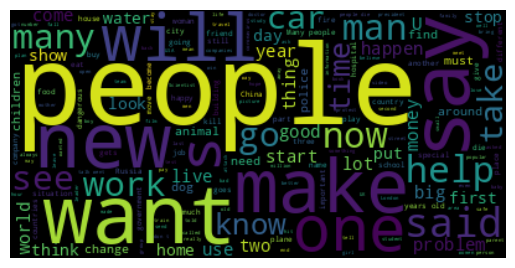

--------------------
Language Level 2


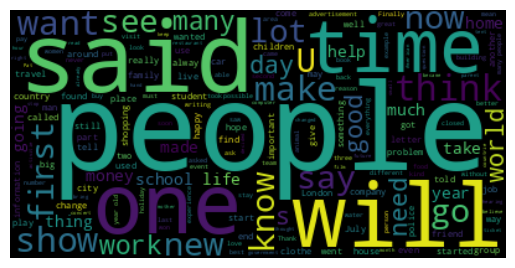

--------------------
Language Level 3


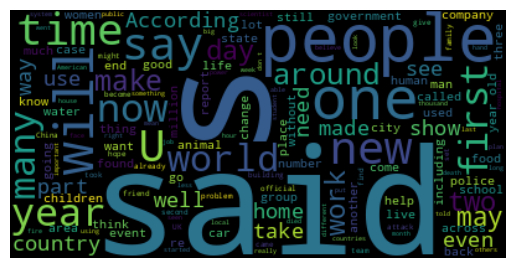

--------------------


In [191]:
from wordcloud import WordCloud

# Create a WordCloud for each level
for label in range(1, 4):
    print("Language Level {}".format(label))
    text = ' '.join(df[df['label'] == label]['text'])
    wordcloud = WordCloud().generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print("-"*20)

### Preprocessing

In [192]:
df_backup = df.copy()

In [200]:
df = df_backup.copy()

In [201]:
df["text"]

0      Hi!\nI've been meaning to write for ages and f...
1      ﻿It was not so much how hard people found the ...
2      Keith recently came back from a trip to Chicag...
3      The Griffith Observatory is a planetarium, and...
4      -LRB- The Hollywood Reporter -RRB- It's offici...
                             ...                        
703    The most important thing to know is that if I ...
704    I don't think study abroad should be a compuls...
705    I think the most important is to have an enjoy...
706    During the first week of easter's holliday, i ...
707    I hope that I will have a job in computer scie...
Name: text, Length: 16334, dtype: object

In [202]:
import contractions
import re

def expand_contractions(text):
    """
    Expands contractions in the input text using the contractions library
    and regular expressions.
    I've -> I have
    He's -> He is
    
    Args:
        text (str): The input text with contractions.
    
    Returns:
        str: The input text with contractions expanded.
    """
    # Use the contractions library to expand the contraction
    text_expanded = contractions.fix(text)

    # Use a regular expression to expand the contraction
    text_expanded_re = re.sub(r'\b(\w+)\'(\w+)\b', r"\1'\2", text_expanded)
    
    # Return the expanded text
    return text_expanded_re

df["modified_text"] = df["text"].parallel_apply(lambda t: expand_contractions(t))

In [203]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import string
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def preprocess_text(text):
    """
    Note: low-income -> low income
    """
    # Convert text to lowercase
    text = text.lower()
    
    # Replace special characters with whitespace
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Remove leading and trailing whitespace
    text = text.strip()
    
    # Tokenize text into individual words
    words = nltk.word_tokenize(text)
    
    # Remove stopwords from the text
    # stop_words = set(stopwords.words('english'))
    # words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words using WordNetLemmatizer
    # lemmatizer = WordNetLemmatizer()
    # words = [lemmatizer.lemmatize(word) for word in words]
    
    # Perform snowball stemming on the words
    # stemmer = SnowballStemmer("english")
    # words = [stemmer.stem(word) for word in words]
    
    # Join the preprocessed words back into a single string
    preprocessed_text = ' '.join(words)
    
    # Remove leading and trailing whitespace
    preprocessed_text = preprocessed_text.strip()
    
    
    return preprocessed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [204]:
df["modified_text"] 

0      Hi!\nI have been meaning to write for ages and...
1      ﻿It was not so much how hard people found the ...
2      Keith recently came back from a trip to Chicag...
3      The Griffith Observatory is a planetarium, and...
4      -LRB- The Hollywood Reporter -RRB- It is offic...
                             ...                        
703    The most important thing to know is that if I ...
704    I do not think study abroad should be a compul...
705    I think the most important is to have an enjoy...
706    During the first week of easter's holliday, i ...
707    I hope that I will have a job in computer scie...
Name: modified_text, Length: 16334, dtype: object

In [205]:
df["modified_text"] = df["modified_text"].parallel_apply(lambda t: preprocess_text(t))

In [206]:
df.modified_text

0      hi i have been meaning to write for ages and f...
1      it was not so much how hard people found the c...
2      keith recently came back from a trip to chicag...
3      the griffith observatory is a planetarium and ...
4      lrb the hollywood reporter rrb it is official ...
                             ...                        
703    the most important thing to know is that if i ...
704    i do not think study abroad should be a compul...
705    i think the most important is to have an enjoy...
706    during the first week of easter s holliday i w...
707    i hope that i will have a job in computer scie...
Name: modified_text, Length: 16334, dtype: object

In [209]:
def split_long_texts(df):
    new_rows = []
    for index, row in df.iterrows():
        text = row['text']
        word_count = len(text.split())

        if word_count > 400:
            start = 0
            while start < word_count:
                end = start + 400
                if end > word_count:
                    end = word_count

                sliced_text = ' '.join(text.split()[start:end])
                new_row = row.copy()
                new_row['text'] = sliced_text
                new_rows.append(new_row)

                start = end

        else:
            new_rows.append(row)

    new_df = pd.DataFrame(new_rows)
    return new_df

In [211]:
df.shape

(16334, 6)

In [212]:
# Split the long texts
new_data = split_long_texts(df)
new_data.shape

(17826, 6)

In [215]:
import nltk
# nltk.download('punkt')
new_data["sentence_count"] = new_data["text"].parallel_apply(lambda t: len(nltk.sent_tokenize(t)))
new_data["word_count"] = new_data["text"].parallel_apply(lambda t: len(nltk.word_tokenize(t)))

In [217]:
df.describe()

,label,sentence_count,word_count
count,16334.000000,16334.000000,16334.000000
mean,2.005204,11.476613,194.264112
std,0.757362,7.935200,197.961008
min,1.000000,1.000000,24.000000
25%,1.000000,7.000000,97.000000
50%,2.000000,9.000000,136.000000
75%,3.000000,14.000000,205.000000
max,3.000000,114.000000,2555.000000


In [216]:
new_data.describe()

,label,sentence_count,word_count
count,17826.000000,17826.000000,17826.000000
mean,2.041568,10.594581,178.004937
std,0.761861,5.316998,114.267313
min,1.000000,1.000000,2.000000
25%,1.000000,7.000000,99.000000
50%,2.000000,9.000000,140.000000
75%,3.000000,14.000000,218.000000
max,3.000000,40.000000,549.000000


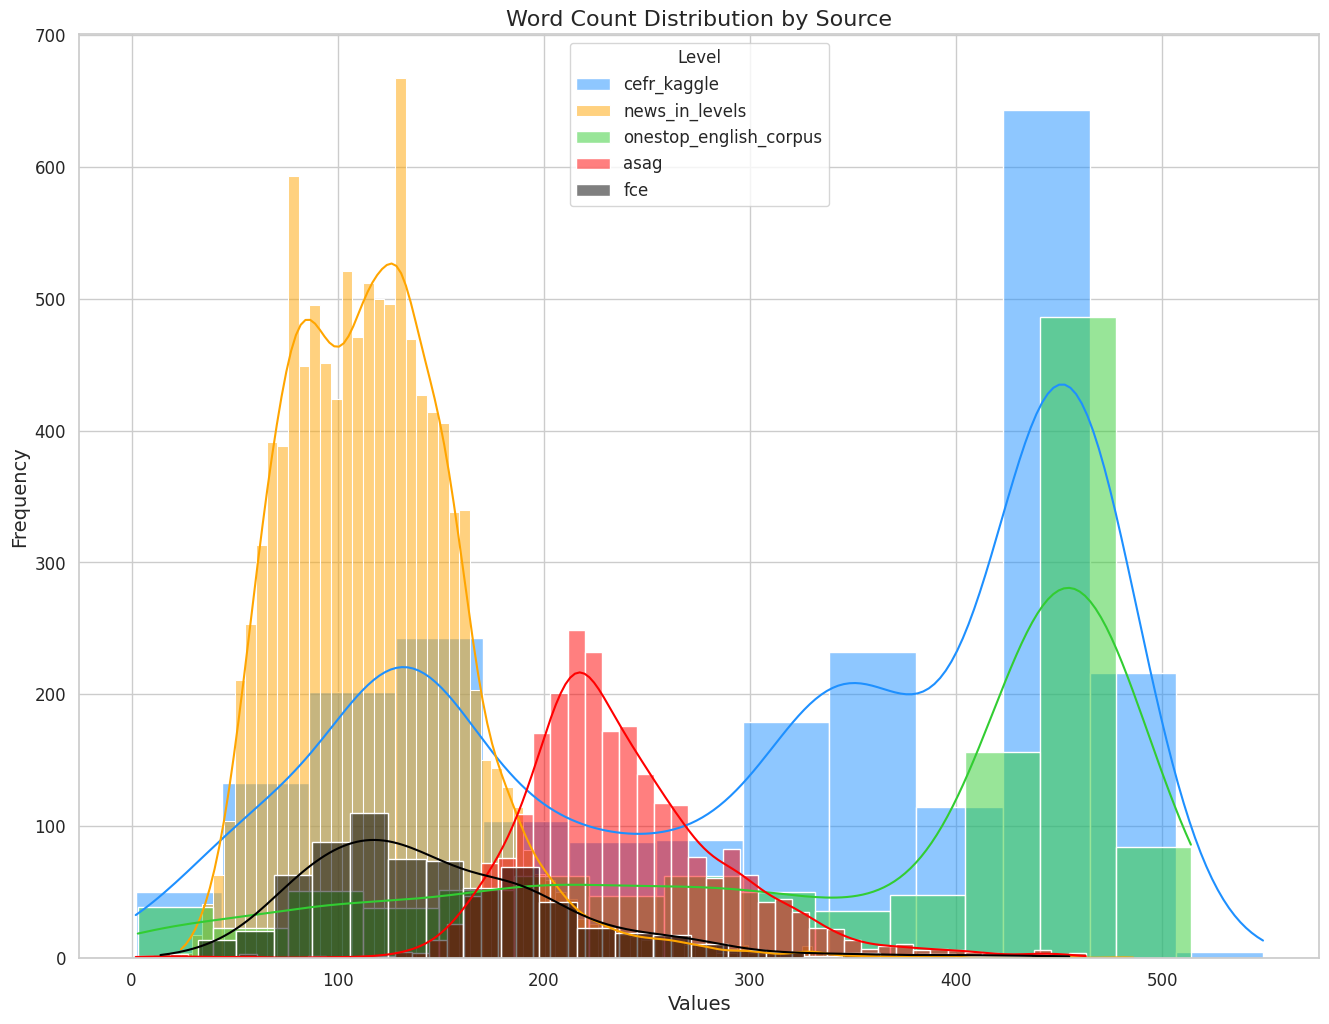

In [218]:
sns.set(style="whitegrid", context="notebook")

# Create the distplot for each level
fig, ax = plt.subplots(figsize=(16, 12))

color_map = {"cefr_kaggle": "dodgerblue", "news_in_levels": "orange", "onestop_english_corpus": "limegreen", "asag": "red", "fce": "black"}

for source in new_data["source"].unique():
    sns.histplot(data=new_data[new_data["source"] == source], 
                 x="word_count", 
                 kde=True, 
                 label=source, 
                 ax=ax, 
                 alpha=.5, 
                 color=color_map[source])

# Customize the plot
ax.set_title("Word Count Distribution by Source", fontsize=16)
ax.set_xlabel("Values", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.legend(title="Level", fontsize=12)
ax.tick_params(axis="both", which="major", labelsize=12)

# Show the plot
plt.show()

In [219]:
df = new_data.copy()
del new_data

#### Most Frequent Words after Preprocessing

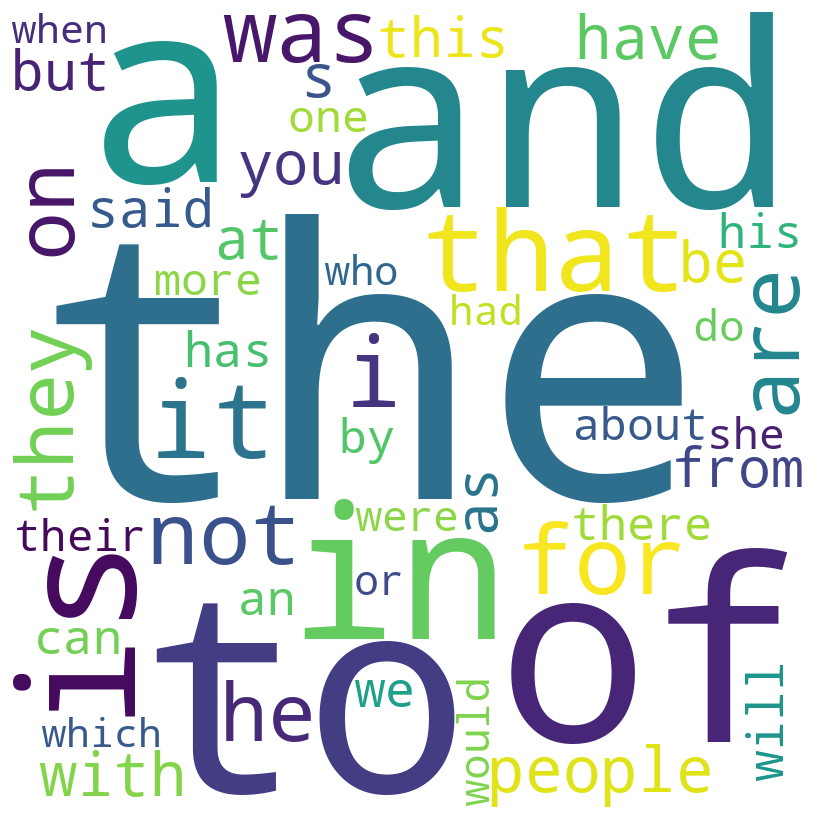

In [220]:
from collections import Counter

# Tokenize the preprocessed text into individual words
words = " ".join(df["modified_text"])
words = nltk.word_tokenize(words)

# Count the frequency of each word
word_freq = Counter(words)

# Create a WordCloud visualization of the most frequent words
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate_from_frequencies(word_freq)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

### CountVectorizer

In [221]:
df.head()

,text,source,label,sentence_count,word_count,modified_text
0,Hi! I've been meaning to write for ages and fi...,cefr_kaggle,2,23,458,hi i have been meaning to write for ages and f...
0,"is getting married, which is also why I wanted...",cefr_kaggle,2,4,67,hi i have been meaning to write for ages and f...
1,﻿It was not so much how hard people found the ...,cefr_kaggle,2,23,443,it was not so much how hard people found the c...
1,"to their thoughts. But, the most staggering re...",cefr_kaggle,2,12,311,it was not so much how hard people found the c...
2,Keith recently came back from a trip to Chicag...,cefr_kaggle,2,14,267,keith recently came back from a trip to chicag...


In [222]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df["modified_text"]
y = df['label']

In [223]:
# Vectorize the text using CountVectorizer with n-grams in the range (1, 2)
vectorizer = CountVectorizer(stop_words="english")

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Print the number of features created
print(f"Number of features created: {len(vectorizer.get_feature_names())}")

Number of features created: 43650


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### LogisticRegression

In [224]:
# Train a Logistic Regression model for multi-class classification
model = LogisticRegression(multi_class='multinomial', 
                           solver='lbfgs', 
                           max_iter=20,
                           penalty = "l2",
                           random_state=42, 
                           n_jobs=num_processors-1)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=20, multi_class='multinomial', n_jobs=3,
                   random_state=42)

In [225]:
y_pred_train = model.predict(X_train_vec)

# Print the classification report
print("Classification report for Train Set")
print(classification_report(y_train, y_pred_train))

Classification report for Train Set
              precision    recall  f1-score   support

           1       0.91      0.93      0.92      3854
           2       0.88      0.89      0.88      5959
           3       0.91      0.87      0.89      4447

    accuracy                           0.90     14260
   macro avg       0.90      0.90      0.90     14260
weighted avg       0.90      0.90      0.90     14260



In [226]:
# Predict the labels on the test set
y_pred = model.predict(X_test_vec)

# Print the classification report
print("Classification report for Test Set")
print(classification_report(y_test, y_pred))

Classification report for Test Set
              precision    recall  f1-score   support

           1       0.82      0.82      0.82       964
           2       0.71      0.74      0.73      1490
           3       0.76      0.70      0.73      1112

    accuracy                           0.75      3566
   macro avg       0.76      0.76      0.76      3566
weighted avg       0.75      0.75      0.75      3566



In [227]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 791  152   21]
 [ 153 1110  227]
 [  25  304  783]]


In [228]:
# Determine the most and least predictive words for each class
n_top = 10  # Number of top features to display
for i, label in enumerate(model.classes_):
    top_features = sorted(zip(model.coef_[i], vectorizer.get_feature_names()), reverse=True)[:n_top]
    bottom_features = sorted(zip(model.coef_[i], vectorizer.get_feature_names()))[:n_top]
    
    print(f"\nClass {label}:")
    print(f"Top {n_top} Positive Coefficient words: {[feature[1] for feature in top_features]}")
    print(f"Top {n_top} Negative Coefficient words: {[feature[1] for feature in bottom_features]}")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Class 1:
Top 10 Positive Coefficient words: ['happens', 'die', 'news', 'starts', 'gets', 'takes', 'mom', 'wants', 'goes', 'dies']
Top 10 Negative Coefficient words: ['according', 'pat', 'died', 'shopping', 'life', 'named', 'killed', 'came', 'used', 'way']

Class 2:
Top 10 Positive Coefficient words: ['intermediate', 'cnn', 'euros', 'filmed', 'worlds', 'died', 'rst', 'pat', 'rrb', 'arrested']
Top 10 Negative Coefficient words: ['happens', 'footage', 'die', 'dad', 'mom', 'starts', 'yes', 'okay', 'gets', 'wins']

Class 3:
Top 10 Positive Coefficient words: ['footage', 'according', 'reported', 'named', 'including', 'likely', 'despite', 'residents', 'taken', 'following']
Top 10 Negative Coefficient words: ['intermediate', 'wants', 'happens', 'news', 'takes', 'makes', 'special', 'worlds', 'problems', 'bad']


**News Articles are dominating the predictions**

#### Combined Feature Importance

In [229]:
clf = model

feature_names = vectorizer.get_feature_names_out()
coefs_with_fns = zip(feature_names, clf.coef_[0])

coefs_with_fns_df = pd.DataFrame(coefs_with_fns,
                    columns=['feature', 'coefficient'])

In [230]:
coefs_with_fns_df.sort_values(by='coefficient', ascending=True, inplace=True)
coefs_with_fns_df.head(10)

,feature,coefficient
1767,according,-1.210717
28790,pat,-1.153701
11882,died,-0.990078
35445,shopping,-0.826530
23212,life,-0.823579
26436,named,-0.789110
22119,killed,-0.785759
6894,came,-0.771380
41339,used,-0.752441
42361,way,-0.745361


##### Prediction Powers

In [231]:
y_pred_prob = model.predict_proba(X_test_vec)
y_pred_class = model.predict(X_test_vec)

In [232]:
X_test_df = pd.DataFrame(X_test)
X_test_df.reset_index(inplace=True, drop=True)

y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(inplace=True, drop=True)

In [233]:
y_pred_prob_df = pd.DataFrame(y_pred_prob)
y_pred_prob_df.columns = ['1-prob', '2-prob', '3-prob']

y_pred_class_df = pd.DataFrame(y_pred_class)
y_pred_class_df.columns = ['predicted']

In [234]:
results_df = pd.DataFrame(X_test).join(y_test_df).join(y_pred_class_df).join(y_pred_prob_df)

In [235]:
pd.options.display.max_colwidth = None
results_df.head(20)

,modified_text,label,predicted,1-prob,2-prob,3-prob
1,to tourists amsterdam still seems very liberal recently the city s mayor told them that the coffee shops that sell marijuana would stay open although there is a new national law to stop drug tourism but the dutch capital has a plan to send antisocial neighbours to scum villages made from shipping containers and so maybe now people will not think it is a liberal city any more the mayor eberhard van der laan says his new plan to solve the problem of antisocial behaviour will cost 810 000 the plan is hopes to protect victims of abuse and homophobia the camps where antisocial families will live for three to six months have been called scum villages because last year geert wilders the far right politician said that offenders should go to a village for scum bartho boer a spokesman for the mayor says that the plans are not illiberal we want to defend the liberal values of amsterdam he says we want everyone to be who he and she is whether they are gay and lesbian or try to stop violence and are then victims of harassment we want to defend them according to boer the villages are not for a problem neighbour who has the stereo too loud on saturday night but people who are very violent and in a clear situation where a victim is harassed again and again people found guilty of violent harassment will be evicted from their homes and put in temporary homes including shipping containers in industrial areas of the city we call it a living container says boer the containers have showers and kitchens and have been used as student accommodation they are going to use the containers because they want to show that if people are antisocial they do not get better accommodation one dutch newspaper wrote that in the 19th century antisocial people were moved to villages in drenthe and overijssel which soon became slums but boer says that the government has learned from past mistakes and is not planning to put antisocial families together they are scum houses not scum villages says boer because we do not want to put more than one of these families in the same area after a maximum of six months in these houses in different parts of the city the families will get permanent homes the city government expects to move about ten families a year which starts in 2013 police will watch the temporary accommodation but antisocial families will also be able to see doctors and social workers we will take care of them so the whole situation is not going to repeat at the new house they are in says boer,3.0,3.0,1.281427e-03,4.295682e-01,0.569150
3,16 12 00 dear andrew i just received your letter and decided you to write back now because of your questions which were about the rules i am really tired of the rules in school actually not all the schools in turkey are so strict but unfortunatly unfortunately the school that i am going to is like a military camp the uniform we are wearing wear has to be perfect no one is allowed to wear anything which is not written in the school rules the general rules which are used in all schools are not so strict however there are a few things that need to be changed for example if you do not come to school for 10 days in a year we you fail that year thank god it is not so strict at home my family allows me almost every thing everything except smoking and drinking alchol alcohol of course which i do not do anyway i am allowed to stay up late i am allowed to bring my friends home and stuff like that however there is one thing that my parents do not like me to do they hate it when i listen to play music loudly i think they do not like the music i listen to this is all that i can tell you about my school and family rules are every where everywhere and you can not change them so just do not think about them your best best pen pen friend,1.0,1.0,9.998818e-01,1.130116e-04,0.000005
3,google has made maps of the world s highest mountains the ocean floor the amazon rainforest and even shown us a b

### NaiveBayesClassifier

In [238]:
from sklearn.naive_bayes import MultinomialNB

# Train a Multinomial Naive Bayes model for multi-class classification
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [239]:
y_pred_train = model.predict(X_train_vec)

# Print the classification report
print("Classification report for Train Set")
print(classification_report(y_train, y_pred_train))

Classification report for Train Set
              precision    recall  f1-score   support

           1       0.65      0.91      0.76      3854
           2       0.77      0.64      0.70      5959
           3       0.84      0.73      0.78      4447

    accuracy                           0.74     14260
   macro avg       0.75      0.76      0.75     14260
weighted avg       0.76      0.74      0.74     14260



In [240]:
# Predict the labels on the test set
y_pred = model.predict(X_test_vec)

# Print the classification report
print("Classification report for Test Set")
print(classification_report(y_test, y_pred))

Classification report for Test Set
              precision    recall  f1-score   support

           1       0.58      0.84      0.69       964
           2       0.63      0.52      0.57      1490
           3       0.73      0.61      0.67      1112

    accuracy                           0.64      3566
   macro avg       0.65      0.66      0.64      3566
weighted avg       0.65      0.64      0.63      3566



In [241]:
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[811 119  34]
 [493 782 215]
 [ 92 341 679]]


### BERTClassifier

KTrain classification models: 

name (string): one of:
- 'fasttext' for FastText model
- 'nbsvm' for NBSVM model
- 'logreg' for logistic regression using embedding layers
- 'bigru' for Bidirectional GRU with pretrained word vectors
- 'bert' for BERT Text Classification
- 'distilbert' for Hugging Face DistilBert model

https://amaiya.github.io/ktrain/text/index.html

In [243]:
import tensorflow as tf
print(tf.__version__)

2.9.3


In [244]:
import ktrain
from ktrain import text

In [245]:
df = df[["modified_text", "label"]]

In [246]:
df["label"] = df["label"] - 1  # change the label to 0, 1, 2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [247]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

In [248]:
print("Shape of train_df", train_df.shape)
print("Shape of test_df", test_df.shape)

Shape of train_df (16043, 2)
Shape of test_df (1783, 2)


In [249]:
# import ktrain
from ktrain import text

# Split the data
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(train_df=train_df,
                                                                   text_column='modified_text',
                                                                   label_columns=['label'],
                                                                   val_pct=0.1,
                                                                   maxlen=350,
                                                                   max_features=35000,
                                                                   preprocess_mode='bert')

['label_0', 'label_1', 'label_2']
      label_0  label_1  label_2
528       0.0      0.0      1.0
8158      0.0      0.0      1.0
1609      0.0      1.0      0.0
7428      0.0      1.0      0.0
1303      0.0      1.0      0.0
['label_0', 'label_1', 'label_2']
      label_0  label_1  label_2
9271      0.0      0.0      1.0
3341      0.0      1.0      0.0
5969      1.0      0.0      0.0
7502      1.0      0.0      0.0
1311      0.0      0.0      1.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
# Create the model
model = text.text_classifier(name='bert',
                             train_data=(x_train, y_train),
                             preproc=preproc)

# Train the model
learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=6)

learner.fit_onecycle(lr=2e-5, epochs=3, verbose=1)

# Save the model
predictor = ktrain.get_predictor(learner.model, preproc)

Is Multi-Label? False
maxlen is 350
done.


begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
2407/2407 [==============================] - 1325s 543ms/step - loss: 0.4088 - accuracy: 0.8349 - val_loss: 0.3019 - val_accuracy: 0.8860
Epoch 2/3
2407/2407 [==============================] - 1302s 541ms/step - loss: 0.2326 - accuracy: 0.9128 - val_loss: 0.2347 - val_accuracy: 0.9103
Epoch 3/3
1004/2407 [===========>..................] - ETA: 12:12 - loss: 0.1102 - accuracy: 0.9595

In [259]:
# Evaluation
y_pred = predictor.predict(list(test_df["modified_text"]))

56/56 [==============================] - 49s 871ms/step


In [260]:
y_true = list(test_df["label"])

In [261]:
y_pred_train = predictor.predict(list(train_df["modified_text"]))
y_true_train = list(train_df["label"])

502/502 [==============================] - 436s 868ms/step


In [262]:
y_pred = [int(_p.split("_")[1]) for _p in y_pred]
y_pred_train =  [int(_p.split("_")[1]) for _p in y_pred_train]

TRAIN SET: Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4339
           1       0.97      0.98      0.97      6712
           2       0.98      0.96      0.97      4992

    accuracy                           0.98     16043
   macro avg       0.98      0.98      0.98     16043
weighted avg       0.98      0.98      0.98     16043



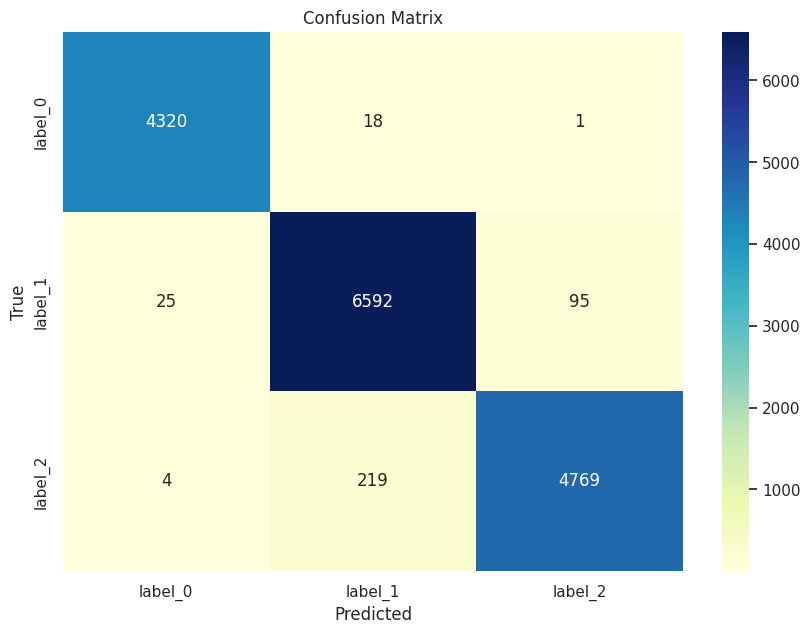

In [263]:
# Classification report
print("TRAIN SET: Classification Report:")
print(classification_report(y_true_train, y_pred_train))

# Confusion Matrix
cm = confusion_matrix(y_true_train, y_pred_train)

# Confusion Matrix Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=preproc.get_classes(),
            yticklabels=preproc.get_classes())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

TEST SET: Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       479
           1       0.88      0.92      0.90       737
           2       0.91      0.85      0.88       567

    accuracy                           0.92      1783
   macro avg       0.92      0.92      0.92      1783
weighted avg       0.92      0.92      0.92      1783



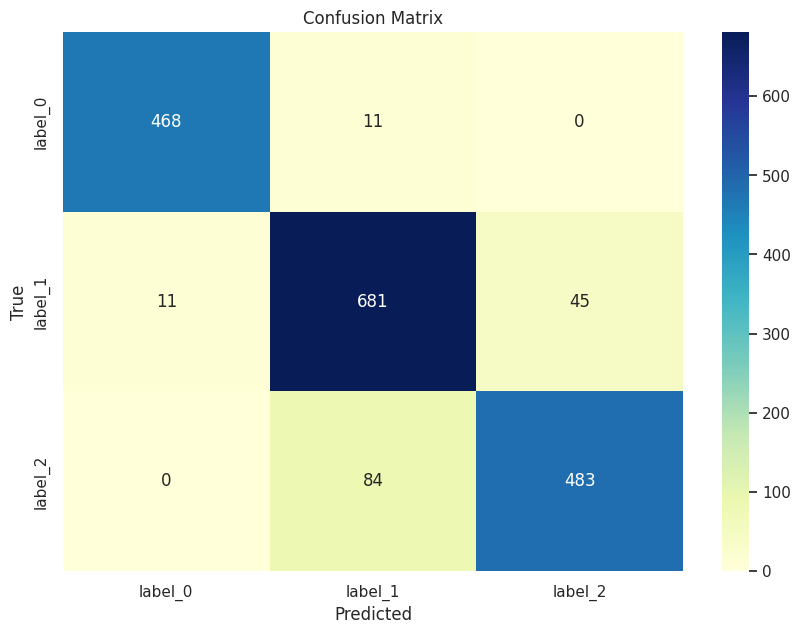

In [264]:
# Classification report
print("TEST SET: Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=preproc.get_classes(),
            yticklabels=preproc.get_classes())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

In [265]:
predictor.save('cefr_ktrain_bert')